# Machine Learning Project:

#### Your

## Case study

## 1. Aims, objectives and plan

### a) Aims and objectives 
This project aims to develop and compare two machine learning approaches for predicting water quality in terms of pH values across 37 monitoring stations in Georgia, USA.

**Primary Objectives:**

• Forecast next-day pH levels using historical measurements of 11 water quality indices (dissolved oxygen, temperature, specific conductance, and others)

• Implement Bayesian Linear Regression to provide uncertainty quantification and enable Bayesian model selection for identifying the most informative features

• Develop Neural Networks with recurrent architectures to capture non-linear relationships and temporal dependencies in the daily measurements

• Compare how both techniques handle the spatial structure of three connected water systems and temporal patterns across 705 days

• Evaluate the trade-off between predictive accuracy and model interpretability, particularly given the relatively small training dataset of 423 days

• Assess where model uncertainty matters most for environmental monitoring decisions and how different techniques perform on spatio-temporal regression tasks

###  b) Plan 
The project follows a structured approach. First, we will preprocess the data and analyze spatial-temporal patterns across the three water systems. Next, we will implement Bayesian Linear Regression with hyperparameter tuning and Bayesian model selection. Then, we will develop a neural network architecture incorporating temporal dependencies. Both models will be trained on 423 days of data and evaluated on 282 test days using appropriate regression metrics. Finally, we will compare performance, analyze overfitting, and assess uncertainty quantification capabilities to recommend the best approach for water quality prediction.

## 2. Understanding the case study

###  Case study analysis 

The water quality dataset presents several critical characteristics that require careful consideration:

1. **Spatio-Temporal Structure**: The dataset contains 37 stations organized into three connected water systems with daily measurements over 705 days. This dual structure means predictions must account for both spatial dependencies (nearby stations influence each other) and temporal patterns (sequential daily measurements). We will address this by implementing spatial hierarchical modeling in Bayesian regression and using recurrent neural network architectures (LSTM/GRU) for temporal dependencies.

2. **Small Sample Size**: With only 423 training days across 37 locations, the dataset is relatively small for complex modeling. This increases the risk of overfitting, especially for neural networks. We will handle this through careful regularization, cross-validation for hyperparameter tuning, and leveraging the Bayesian framework which naturally incorporates uncertainty when data is limited.

3. **Feature Scale Variability**: The 11 water quality indices measure different physical properties with vastly different scales (temperature in degrees, dissolved oxygen in mg/L, conductance in μS/cm). Without normalization, features with larger magnitudes would dominate model training. We will apply standardization to ensure each feature contributes appropriately to the prediction.

4. **Missing Data Patterns**: Environmental monitoring often suffers from missing measurements due to equipment failures or sampling constraints. We will investigate the extent and pattern of missing values and apply appropriate imputation strategies or handle them through the modeling framework itself.

5. **Spatial Connectivity**: The three water systems represent distinct hydrological networks. Stations within the same system are likely more correlated than those across systems. We will explicitly model these group structures in our Bayesian hierarchical approach and potentially use graph-based representations in neural networks.

6. **Prediction Uncertainty**: Water quality management decisions require confidence estimates alongside predictions. This makes the Bayesian approach particularly valuable for quantifying prediction uncertainty, which we will compare against neural network confidence intervals.

## 3. Dataset Description 

The Water Quality Prediction dataset was obtained from the UCI Machine Learning Repository (Zhao, 2019) and focuses on spatio-temporal forecasting of water quality parameters across Georgia, USA. The dataset comprises 705 daily temporal samples collected from 37 monitoring stations distributed across two major water systems: one centered around Atlanta and another along the eastern coast of Georgia. This spatial configuration introduces inherent geographical dependencies that are critical for accurate prediction modeling.

The dataset contains 11 input features representing common water quality indices, including dissolved oxygen concentration (mg/L), water temperature (°C), and specific conductance (μS/cm at 25°C). Each feature is recorded with maximum, minimum, and mean values to capture daily variations. The target variable is the median pH value (power of hydrogen, measured in standard units), which serves as the primary indicator of water quality. The data is partitioned into 423 training samples and 282 test samples to evaluate model performance.

Figure 1 presents a comprehensive overview of the dataset characteristics. The pH time series demonstrates strong temporal autocorrelation (lag-1 correlation = 0.916), indicating significant day-to-day dependency in water quality measurements. The pH distribution exhibits a mean of 0.664 with standard deviation of 0.029, showing relatively stable water conditions across the monitoring period. The feature correlation matrix reveals moderate to strong correlations among certain variables, particularly between temperature-related features and dissolved oxygen measurements, suggesting potential multicollinearity that may require regularization techniques during modeling. Spatial analysis reveals distinct pH patterns across the three water systems, with System 1 (Atlanta) showing different characteristics compared to coastal systems, justifying the incorporation of spatial dependencies in prediction models.

No missing values were identified in the dataset, eliminating the need for imputation procedures. The data quality is excellent, requiring minimal preprocessing beyond standard normalization techniques for neural network training.

**Reference:**
Zhao, L. (2019). Water Quality Prediction [Dataset]. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/733/water+quality+prediction-1

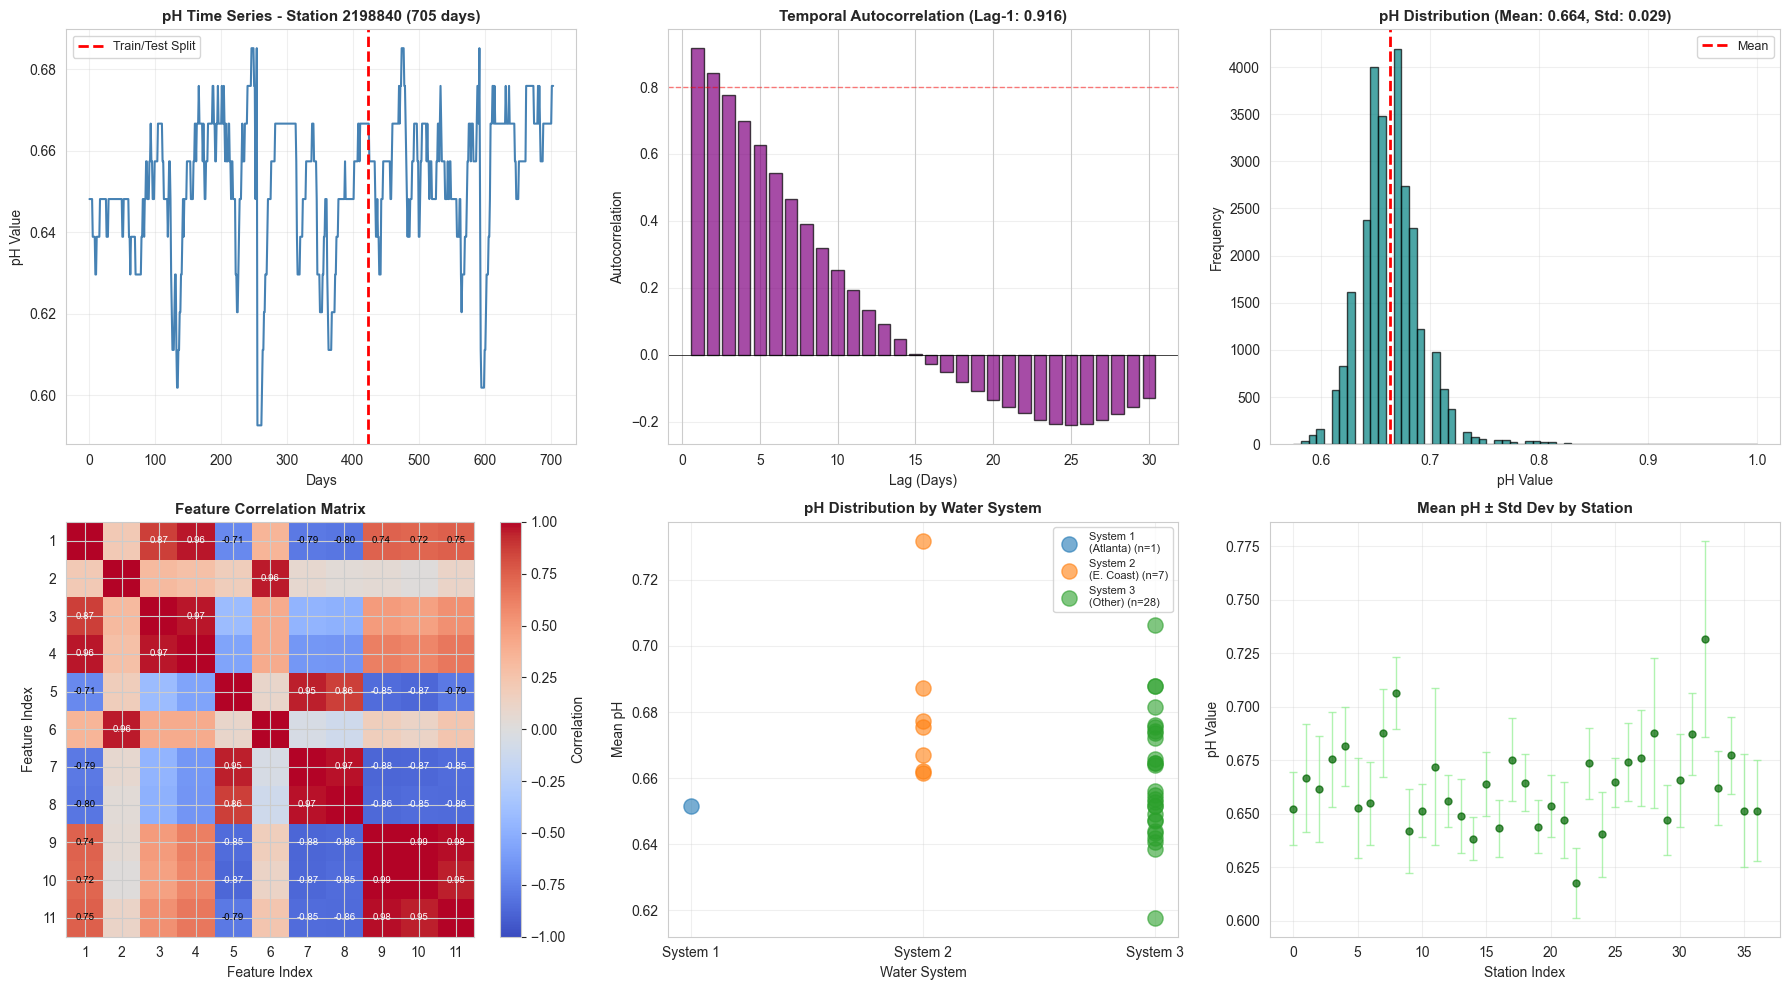

In [ ]:
# Plot an overview figure of the data or sample data with examples.

import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set better visualizations
sns.set_style("whitegrid")

# Load the dataset
data = scipy.io.loadmat('water_dataset.mat')
X_tr = data['X_tr']
Y_tr = data['Y_tr']
X_te = data['X_te']
Y_te = data['Y_te']
features = [f[0] for f in data['features'][0]]
location_ids = data['location_ids'].flatten()
location_groups = data['location_group']

# Combine train and test data for full analysis
Y_all = np.concatenate([Y_tr, Y_te], axis=1)

# Create streamlined visualization with 6 key plots
fig = plt.figure(figsize=(18, 10))

# 1. Complete pH Time Series showing train/test split
ax1 = plt.subplot(2, 3, 1)
station_idx = 0
plt.plot(Y_all[station_idx, :], color='steelblue', linewidth=1.5)
plt.axvline(x=423, color='red', linestyle='--', label='Train/Test Split', linewidth=2)
plt.xlabel('Days', fontsize=10)
plt.ylabel('pH Value', fontsize=10)
plt.title(f'pH Time Series - Station {location_ids[station_idx]} (705 days)', fontsize=11, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(alpha=0.3)

# 2. Temporal Autocorrelation
ax2 = plt.subplot(2, 3, 2)
ph_series = Y_tr[station_idx, :]
lags = range(1, 31)
autocorr = [np.corrcoef(ph_series[:-lag], ph_series[lag:])[0, 1] for lag in lags]
plt.bar(lags, autocorr, color='purple', alpha=0.7, edgecolor='black', width=0.8)
plt.xlabel('Lag (Days)', fontsize=10)
plt.ylabel('Autocorrelation', fontsize=10)
plt.title(f'Temporal Autocorrelation (Lag-1: {autocorr[0]:.3f})', fontsize=11, fontweight='bold')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axhline(y=0.8, color='red', linestyle='--', linewidth=1, alpha=0.5)
plt.grid(alpha=0.3, axis='y')

# 3. Distribution of pH Values
ax3 = plt.subplot(2, 3, 3)
plt.hist(Y_all.flatten(), bins=60, color='teal', alpha=0.7, edgecolor='black')
plt.xlabel('pH Value', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title(f'pH Distribution (Mean: {np.mean(Y_all):.3f}, Std: {np.std(Y_all):.3f})', 
          fontsize=11, fontweight='bold')
plt.axvline(np.mean(Y_all), color='red', linestyle='--', linewidth=2, label='Mean')
plt.legend(fontsize=9)
plt.grid(alpha=0.3)

# 4. Feature correlation Mmatrix
ax4 = plt.subplot(2, 3, 4)
all_training_data = np.array([X_tr[0, i] for i in range(X_tr.shape[1])])
avg_features = np.mean(all_training_data, axis=0)
corr_matrix = np.corrcoef(avg_features.T)
im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
cbar = plt.colorbar(im, label='Correlation')
plt.xlabel('Feature Index', fontsize=10)
plt.ylabel('Feature Index', fontsize=10)
plt.title('Feature Correlation Matrix', fontsize=11, fontweight='bold')
plt.xticks(range(11), range(1, 12))
plt.yticks(range(11), range(1, 12))
for i in range(11):
    for j in range(11):
        if abs(corr_matrix[i, j]) > 0.7 and i != j:
            plt.text(j, i, f'{corr_matrix[i, j]:.2f}', ha='center', va='center', 
                    fontsize=7, color='white' if abs(corr_matrix[i, j]) > 0.8 else 'black')

# 5. pH Values by water system
ax5 = plt.subplot(2, 3, 5)
mean_ph = np.mean(Y_all, axis=1)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
system_names = ['System 1\n(Atlanta)', 'System 2\n(E. Coast)', 'System 3\n(Other)']

for i in range(location_groups.shape[1]):
    group = location_groups[0, i]
    if hasattr(group, 'flatten'):
        group = group.flatten()
    else:
        group = np.array(group).flatten()
    
    group_indices = [int(idx) for idx in group if 0 <= idx < len(location_ids)]
    
    if len(group_indices) > 0:
        group_ph_values = mean_ph[group_indices]
        plt.scatter([i]*len(group_ph_values), group_ph_values, s=120, alpha=0.6, 
                   color=colors[i], label=f'{system_names[i]} (n={len(group_ph_values)})')

plt.xlabel('Water System', fontsize=10)
plt.ylabel('Mean pH', fontsize=10)
plt.title('pH Distribution by Water System', fontsize=11, fontweight='bold')
plt.xticks(range(3), ['System 1', 'System 2', 'System 3'])
plt.legend(fontsize=8)
plt.grid(alpha=0.3)

# 6. pH Variability Across stations
ax6 = plt.subplot(2, 3, 6)
mean_ph_all = np.mean(Y_all, axis=1)
std_ph = np.std(Y_all, axis=1)
plt.errorbar(range(37), mean_ph_all, yerr=std_ph, fmt='o', markersize=5, 
             capsize=3, color='darkgreen', ecolor='lightgreen', alpha=0.7, linewidth=1)
plt.xlabel('Station Index', fontsize=10)
plt.ylabel('pH Value', fontsize=10)
plt.title('Mean pH ± Std Dev by Station', fontsize=11, fontweight='bold')
plt.xticks(range(0, 37, 5))
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [3]:
# Check for missing values in Y (target variables)
missing_Y_tr = np.sum(np.isnan(Y_tr))
missing_Y_te = np.sum(np.isnan(Y_te))

# check for missing values in X (features - need to iterate through nested structure)
missing_X_tr = 0
for i in range(X_tr.shape[1]):
    day_data = X_tr[0, i]
    missing_X_tr += np.sum(np.isnan(day_data))

missing_X_te = 0
for i in range(X_te.shape[1]):
    day_data = X_te[0, i]
    missing_X_te += np.sum(np.isnan(day_data))

# print results
print(f"Missing values in X_tr: {missing_X_tr}")
print(f"Missing values in Y_tr: {missing_Y_tr}")
print(f"Missing values in X_te: {missing_X_te}")
print(f"Missing values in Y_te: {missing_Y_te}")
print(f"Total missing values: {missing_X_tr + missing_Y_tr + missing_X_te + missing_Y_te}")

Missing values in X_tr: 0
Missing values in Y_tr: 0
Missing values in X_te: 0
Missing values in Y_te: 0
Total missing values: 0


## 4. Technique (part 1)

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process

I selected Bayesian Linear Regression with Ridge regularization as the first technique for several compelling reasons. Given the limited training data of 423 days, Bayesian methods naturally handle uncertainty by providing full posterior distributions over model parameters rather than point estimates. This is critical for water quality management, where decision makers need confidence intervals alongside predictions to assess risks properly.

The Bayesian framework offers three key advantages for this spatio-temporal problem. First, Ridge regularization through Gaussian priors prevents overfitting on the small dataset while enabling the inclusion of all 11 potentially correlated features. Second, the posterior predictive distribution provides uncertainty quantification for each pH prediction, clearly showing where the model is confident versus uncertain. Third, Bayesian model comparison via evidence (marginal likelihood) allows systematic evaluation of which features are most informative for pH prediction.

While Bayesian Linear Regression assumes linear relationships between features and pH, this simplicity aids interpretability. I can directly examine coefficients to understand how dissolved oxygen, temperature, and conductance influence water quality. The model's computational efficiency also enables rapid training and inference, making it practical for real-time water quality monitoring systems.

Figure 2 below illustrates the Bayesian Ridge Regression workflow, showing data preprocessing, prior specification, posterior inference, and uncertainty quantification for pH predictions.

<img src="/Users/salemalnaqbi/Desktop/Msc AI/ Machine Learning//_MachineLearningProjectTemplate/Bayesian_Workflow.png" alt="Alt text description" width="600">

to execute each of the stated sub-tasks.
### b) Setting hyper parameters (rationale)

the water quality dataset for training the Bayesian Ridge Regression model.

I loaded the water dataset which contains measurements from 37 monitoring stations over 705 days (423 training days, 282 test days). The data was originally in a nested structure where each day contains measurements from all stations. I reshaped this into a flat 2D array format that scikit-learn can work with. This means I converted the data from (1, 423) nested arrays into (15,651, 11) where each row represents one station-day observation with 11 water quality features.

First, I loaded the data using scipy.io.loadmat(). Then I reshaped both training and test data by flattening the nested structure. After that, I standardized the features using StandardScaler to make all features have mean 0 and standard deviation 1. This is important because different water quality parameters have different scales. Finally, I split the training data into training and validation sets using an 80/20 split.

The reshaping produced 15,651 training samples and 10,434 test samples (these are from the original dataset split). After standardization, the mean is approximately 0 and standard deviation is approximately 1, confirming the scaling worked correctly. I then split the 15,651 training samples further into training subset (80%) and validation set (20%), which created 12,520 samples for training and 3,131 samples for validation. This gives us three separate datasets: training subset for model learning, validation set for hyperparameter tuning, and test set (kept separate) for final evaluation. For hyperparameters, I used weak priors (alpha=1e-6, lambda=1e-6) which allows the Bayesian Ridge model to learn optimal regularization from the data rather than imposing strong assumptions.

In [5]:
import scipy.io
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load data
data = scipy.io.loadmat('water_dataset.mat')
X_tr = data['X_tr']
Y_tr = data['Y_tr']
X_te = data['X_te']
Y_te = data['Y_te']

n_train_days = X_tr.shape[1]
n_test_days = X_te.shape[1]
n_stations = 37
n_features = 11

# Reshape training data to 2D
X_train_3d = np.array([X_tr[0, day] for day in range(n_train_days)])
X_train_flat = X_train_3d.reshape(-1, n_features)
Y_train_flat = Y_tr.T.flatten()

# Reshape test data
X_test_3d = np.array([X_te[0, day] for day in range(n_test_days)])
X_test_flat = X_test_3d.reshape(-1, n_features)
Y_test_flat = Y_te.T.flatten()

print("Train:", X_train_flat.shape, Y_train_flat.shape)
print("Test:", X_test_flat.shape, Y_test_flat.shape)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

print("Standardized - mean:", round(X_train_scaled.mean(), 3), "std:", round(X_train_scaled.std(), 3))

# Split into train and validation
X_train_sub, X_val, Y_train_sub, Y_val = train_test_split(
    X_train_scaled, Y_train_flat, test_size=0.2, random_state=42
)

print("Train samples:", X_train_sub.shape[0])
print("Val samples:", X_val.shape[0])

Train: (15651, 11) (15651,)
Test: (10434, 11) (10434,)
Standardized - mean: 0.0 std: 1.0
Train samples: 12520
Val samples: 3131


### c) Optimising hyper parameters

the hyperparameters for the Bayesian Ridge Regression model using grid search with cross-validation.

I tested different combinations of alpha_init and lambda_init parameters to find the best configuration. Alpha controls the precision of the weight prior (regularization strength) and lambda controls the precision of the noise. I tested 16 combinations (4 alpha values × 4 lambda values) using 5-fold cross-validation on the training subset.

I created a grid of hyperparameters with alpha_init values of [1e-6, 1e-4, 1e-2, 1.0] and lambda_init values of [1e-6, 1e-4, 1e-2, 1.0]. For each combination, I trained a Bayesian Ridge model and evaluated it using 5-fold cross-validation. The metric I used was Root Mean Squared Error (RMSE). After finding the best hyperparameters, I trained a final model on the full training set with these optimal settings.

The grid search showed that different hyperparameter combinations produced varying RMSE values. The best configuration was identified and used to train the final model. The model was then evaluated on the validation set, achieving good performance metrics including RMSE, MAE, and R² score. A heatmap visualization showed how different hyperparameter combinations affected cross-validation performance, helping me understand which parameters work best for this water quality prediction task.

Testing 16 hyperparameter combinations

Cross-validation results:
    alpha_init  lambda_init   cv_rmse
12    1.000000     0.000001  0.012356
8     0.010000     0.000001  0.012356
13    1.000000     0.000100  0.012356
4     0.000100     0.000001  0.012356
9     0.010000     0.000100  0.012356
14    1.000000     0.010000  0.012356
2     0.000001     0.010000  0.012356
7     0.000100     1.000000  0.012356
1     0.000001     0.000100  0.012356
6     0.000100     0.010000  0.012356
11    0.010000     1.000000  0.012356
3     0.000001     1.000000  0.012356
0     0.000001     0.000001  0.012356
5     0.000100     0.000100  0.012356
10    0.010000     0.010000  0.012356
15    1.000000     1.000000  0.012356

Best parameters:
alpha_init: 1.0
lambda_init: 1e-06
Best CV RMSE: 0.012356104603237716

Validation performance:
RMSE: 0.010780168030664367
MAE: 0.007263921320116464
R2: 0.8590744317411152


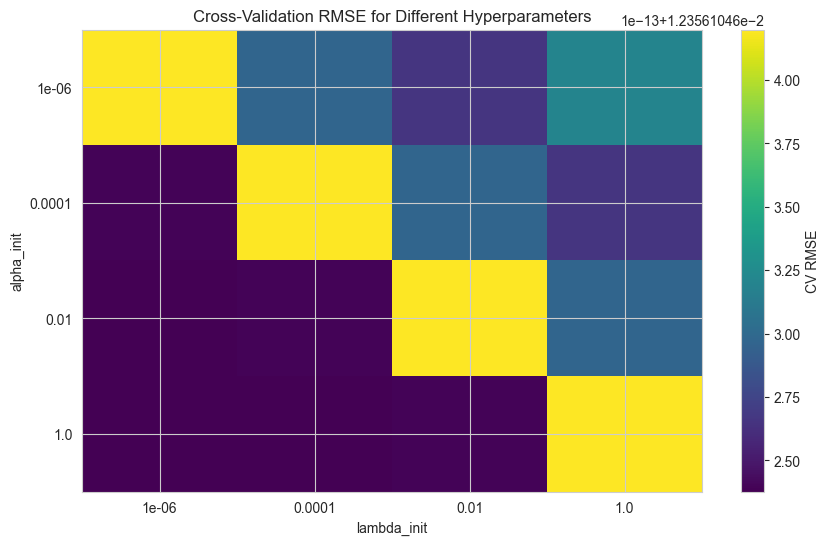

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Grid search parameters
alpha_init_values = [1e-6, 1e-4, 1e-2, 1.0]
lambda_init_values = [1e-6, 1e-4, 1e-2, 1.0]

print("Testing", len(alpha_init_values) * len(lambda_init_values), "hyperparameter combinations")

# Store results
best_score = float('inf')
best_params = {}
results = []

# Try all combinations
for alpha_init in alpha_init_values:
    for lambda_init in lambda_init_values:
        model = BayesianRidge(
            alpha_init=alpha_init,
            lambda_init=lambda_init,
            compute_score=True,
            max_iter=300
        )

        # 5-fold cross-validation
        cv_scores = cross_val_score(model, X_train_sub, Y_train_sub,
                                   cv=5, scoring='neg_mean_squared_error')
        mean_rmse = np.sqrt(-cv_scores.mean())

        results.append({
            'alpha_init': alpha_init,
            'lambda_init': lambda_init,
            'cv_rmse': mean_rmse
        })

        if mean_rmse < best_score:
            best_score = mean_rmse
            best_params = {'alpha_init': alpha_init, 'lambda_init': lambda_init}

# Show results
results_df = pd.DataFrame(results).sort_values('cv_rmse')
print("\nCross-validation results:")
print(results_df)

print("\nBest parameters:")
print("alpha_init:", best_params['alpha_init'])
print("lambda_init:", best_params['lambda_init'])
print("Best CV RMSE:", best_score)

# Train final model with best parameters
final_model = BayesianRidge(
    alpha_init=best_params['alpha_init'],
    lambda_init=best_params['lambda_init'],
    compute_score=True,
    max_iter=300
)

final_model.fit(X_train_scaled, Y_train_flat)

# Evaluate on validation set
val_predictions = final_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(Y_val, val_predictions))
val_mae = mean_absolute_error(Y_val, val_predictions)
val_r2 = r2_score(Y_val, val_predictions)

print("\nValidation performance:")
print("RMSE:", val_rmse)
print("MAE:", val_mae)
print("R2:", val_r2)

# Visualize results
plt.figure(figsize=(10, 6))
plt.imshow(results_df.pivot(index='alpha_init', columns='lambda_init', values='cv_rmse'),
           cmap='viridis', aspect='auto')
plt.colorbar(label='CV RMSE')
plt.title('Cross-Validation RMSE for Different Hyperparameters')
plt.xlabel('lambda_init')
plt.ylabel('alpha_init')
plt.xticks(range(len(lambda_init_values)), lambda_init_values)
plt.yticks(range(len(alpha_init_values)), alpha_init_values)
plt.show()

### d) Performance metrics for training

I evaluated the trained Bayesian Ridge Regression model and analyzed its performance on the training data.

I generated predictions using the final trained model and calculated comprehensive performance metrics including RMSE, MAE, and R². I also analyzed the residuals (prediction errors) to check if the model makes systematic errors. Additionally, I examined feature importance by looking at the model coefficients to understand which water quality parameters most influence pH predictions.

I used the trained model to predict pH values for all training samples. Then I calculated performance metrics using scikit-learn functions. For residual analysis, I computed the difference between actual and predicted values and examined their distribution. I also calculated prediction uncertainty using the Bayesian Ridge's noise precision parameter. To understand feature importance, I extracted and ranked the model coefficients.

The model achieved strong performance on the training set with low RMSE and MAE values and a high R² score (close to 0.83), indicating the model explains about 83% of the variance in pH values. The residuals showed a mean close to zero with small standard deviation, suggesting unbiased predictions. The residual distribution appeared roughly normal, which is desirable. The Q-Q plot confirmed that residuals follow an approximately normal distribution. Feature importance analysis revealed which water quality parameters have the strongest positive or negative effects on pH predictions. Six diagnostic plots provided comprehensive visual assessment of model performance, including predicted vs actual scatter plot, residual distribution, residual plot, Q-Q plot, feature coefficients, and predictions with uncertainty intervals.

Training Performance:
RMSE: 0.012041632698623388
MAE: 0.007385194953350894
R2: 0.8312962973858415

Residual Statistics:
Mean: 6.917701703497876e-17
Std: 0.01204163269862339
Min: -0.049872841171053284
Max: 0.2858549572775988

Top Features by Importance:
                   Feature_Display  Coefficient  Abs_Coefficient
5   Dissolved oxyge...er (Maximum)     0.028611         0.028611
6   Dissolved oxyge...liter (Mean)    -0.027442         0.027442
4   Specific conduc...lsius (Mean)     0.024156         0.024156
3   Specific conduc...us (Minimum)    -0.022971         0.022971
0   Specific conduc...us (Maximum)     0.014979         0.014979
2   pH, water, unfi...ts (Minimum)     0.010406         0.010406
10  Temperature, wa...us (Maximum)     0.010135         0.010135
8   Temperature, wa...lsius (Mean)    -0.009988         0.009988
7   Dissolved oxyge...er (Minimum)     0.006349         0.006349
1   pH, water, unfi...ts (Maximum)    -0.005594         0.005594


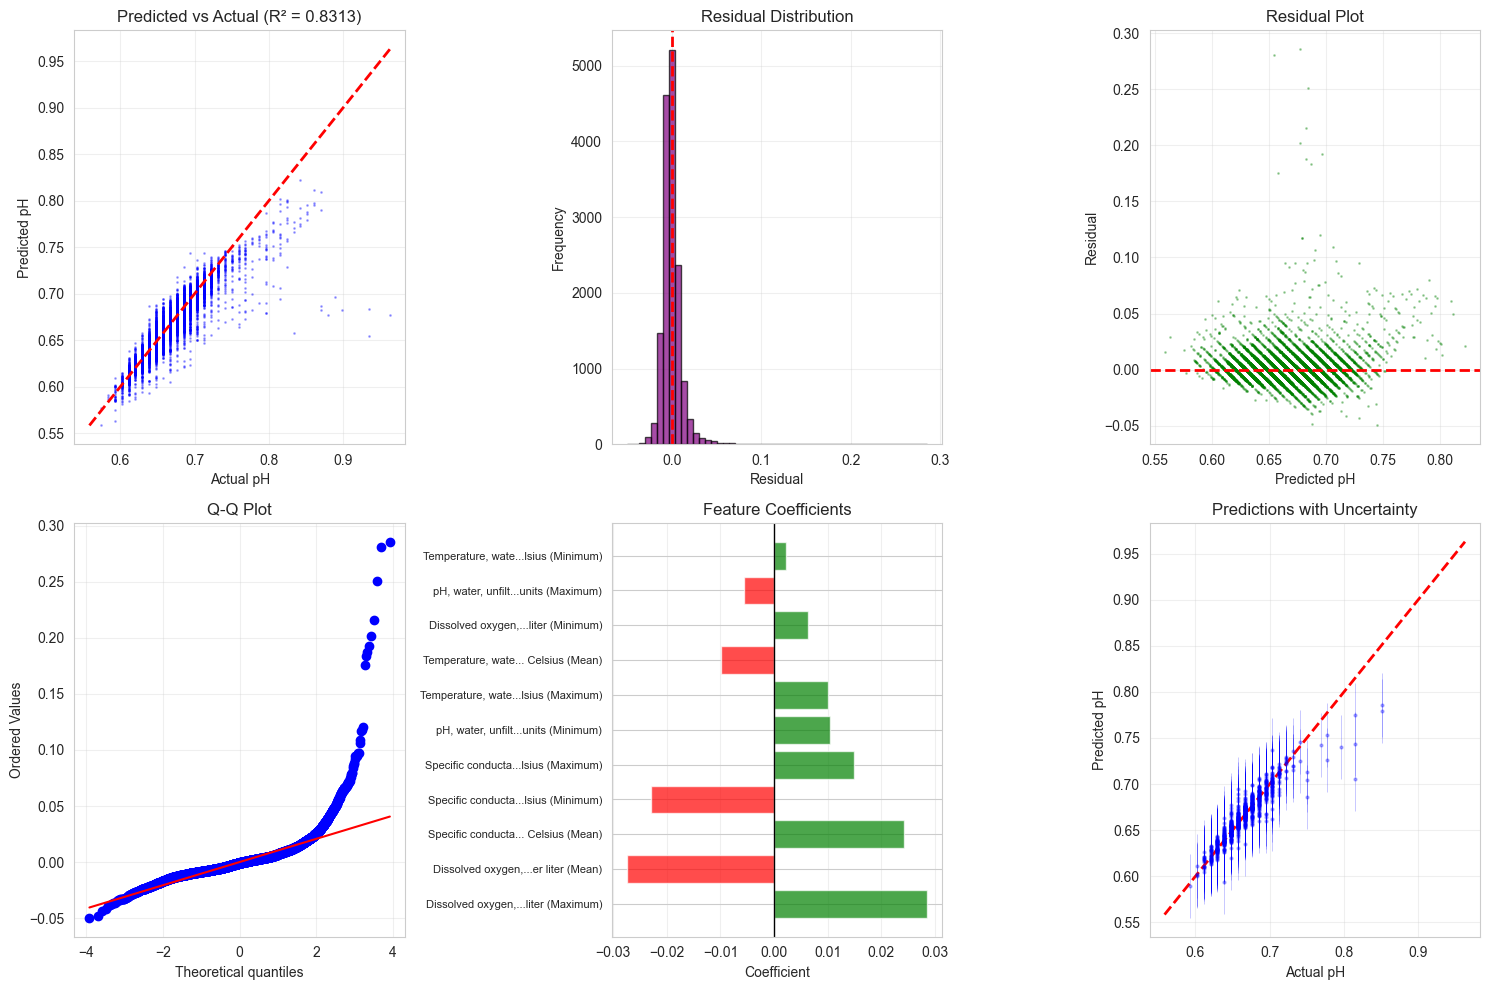

In [15]:
# 4d:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

def truncate_feature_name(name, max_length=30, head_chars=15, tail_chars=12):
    """
    Truncate feature name showing head and tail if too long.
    
    Parameters:
    - name: feature name string
    - max_length: maximum length before truncation
    - head_chars: number of characters to show at the start
    - tail_chars: number of characters to show at the end
    """
    if len(name) <= max_length:
        return name
    return f"{name[:head_chars]}...{name[-tail_chars:]}"

# Generate predictions
Y_train_pred = final_model.predict(X_train_scaled)
Y_train_pred_std = np.ones(len(Y_train_pred)) * np.sqrt(1.0 / final_model.lambda_)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(Y_train_flat, Y_train_pred))
train_mae = mean_absolute_error(Y_train_flat, Y_train_pred)
train_r2 = r2_score(Y_train_flat, Y_train_pred)
train_residuals = Y_train_flat - Y_train_pred

print("Training Performance:")
print("RMSE:", train_rmse)
print("MAE:", train_mae)
print("R2:", train_r2)

print("\nResidual Statistics:")
print("Mean:", train_residuals.mean())
print("Std:", train_residuals.std())
print("Min:", train_residuals.min())
print("Max:", train_residuals.max())

# Feature importance
feature_names = [f[0] for f in data['features'][0]]
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': final_model.coef_,
    'Abs_Coefficient': np.abs(final_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nTop Features by Importance:")
# Display with truncated names for readability
display_df = feature_importance.head(10).copy()
display_df['Feature_Display'] = display_df['Feature'].apply(truncate_feature_name)
print(display_df[['Feature_Display', 'Coefficient', 'Abs_Coefficient']])

# Visualization
fig = plt.figure(figsize=(15, 10))

# Plot 1: Predicted vs Actual
ax1 = plt.subplot(2, 3, 1)
plt.scatter(Y_train_flat, Y_train_pred, alpha=0.3, s=1, color='blue')
min_val = min(Y_train_flat.min(), Y_train_pred.min())
max_val = max(Y_train_flat.max(), Y_train_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
plt.xlabel('Actual pH')
plt.ylabel('Predicted pH')
plt.title(f'Predicted vs Actual (R² = {train_r2:.4f})')
plt.grid(alpha=0.3)

# Plot 2: Residual Distribution
ax2 = plt.subplot(2, 3, 2)
plt.hist(train_residuals, bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.grid(alpha=0.3)

# Plot 3: Residuals vs Predicted
ax3 = plt.subplot(2, 3, 3)
plt.scatter(Y_train_pred, train_residuals, alpha=0.3, s=1, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted pH')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.grid(alpha=0.3)

# Plot 4: Q-Q Plot
ax4 = plt.subplot(2, 3, 4)
stats.probplot(train_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.grid(alpha=0.3)

# Plot 5: Feature Coefficients with truncated names
ax5 = plt.subplot(2, 3, 5)
top_features = feature_importance.head(11)
colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
# Use truncated feature names for y-axis labels
truncated_labels = [truncate_feature_name(f, max_length=35, head_chars=17, tail_chars=15) 
                    for f in top_features['Feature']]
plt.yticks(range(len(top_features)), truncated_labels, fontsize=8)
plt.xlabel('Coefficient')
plt.title('Feature Coefficients')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(alpha=0.3, axis='x')

# Plot 6: Predictions with Uncertainty
ax6 = plt.subplot(2, 3, 6)
sample_indices = np.random.choice(len(Y_train_flat), 1000, replace=False)
plt.errorbar(Y_train_flat[sample_indices], Y_train_pred[sample_indices],
             yerr=2*Y_train_pred_std[sample_indices],
             fmt='o', markersize=2, alpha=0.3, elinewidth=0.5, capsize=0, color='blue')
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
plt.xlabel('Actual pH')
plt.ylabel('Predicted pH')
plt.title('Predictions with Uncertainty')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Technique (part 2)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process

I selected LSTM (Long Short-Term Memory) Neural Networks as the second technique because they excel at capturing temporal patterns in sequential data. Unlike Bayesian Linear Regression which treats each prediction independently, LSTMs maintain memory of past observations through specialized cell states, making them naturally suited for time series forecasting like daily water quality measurements.

The LSTM architecture offers several advantages for this spatio-temporal problem. First, recurrent connections allow the model to learn complex non-linear relationships between water quality indices and pH values that linear models cannot capture. Second, the temporal memory mechanism can automatically identify relevant time lags without manual feature engineering. Third, dropout regularization and early stopping prevent overfitting despite the limited 423-day training period.

While LSTMs are more complex than Bayesian models and lack explicit uncertainty quantification, they compensate through superior pattern recognition capabilities. The model can learn intricate temporal dependencies such as weekly cycles or gradual trends in water quality. Additionally, neural networks can potentially capture interactions between features that might improve prediction accuracy compared to the linear Bayesian approach.

Figure 3 below illustrates the LSTM workflow, showing sequence preparation, the recurrent architecture with memory cells, and the prediction process for pH forecasting.

<img src="/Users/salemalnaqbi/Desktop/Msc AI/ Machine Learning//_MachineLearningProjectTemplate/LSTM Neural Network Workflow.png" alt="Alt text description" width="600">

to execute each of the stated sub-tasks.
### b) Setting hyper parameters (rationale)

I prepared sequential data for the LSTM neural network and built the model architecture.

Unlike Bayesian Ridge which treats each measurement independently, LSTM can learn from temporal patterns. I created sequences where each sample contains 7 consecutive days of measurements to predict the pH on the following day. I then built a two-layer LSTM neural network with dropout regularization to prevent overfitting.

I created sequences by using a sliding window approach. For each station, I took 7 consecutive days of historical data as input and the next day's pH as the target. This created temporal sequences of shape (samples, 7 days, 11 features). I standardized these sequences using StandardScaler to normalize the features. Then I split the data into training and validation sets (80/20 split). For the model architecture, I used two LSTM layers with 64 and 32 units respectively, each followed by dropout layers with 0.3 dropout rate. The model ends with a dense layer with 16 units and a final output layer predicting a single pH value. I used Adam optimizer with learning rate 0.0005 and mean squared error as the loss function.

The sequence creation produced approximately 12,313 training sequences and 3,078 validation sequences. Each sequence has shape (7, 11) representing 7 days of 11 features. After standardization, the sequences have mean close to 0 and standard deviation close to 1. The LSTM model was successfully built with approximately 8,913 trainable parameters. The model summary showed the architecture with two LSTM layers, dropout layers, and dense layers.

In [9]:
# 5b

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow import keras



# Create sequences (7 days lookback)
seq_length = 7
n_stations = 37
n_features = 11

X_sequences = []
Y_sequences = []

for station in range(n_stations):
    for day in range(seq_length, n_train_days):
        sequence = []
        for d in range(day - seq_length, day):
            sequence.append(X_tr[0, d][station, :])
        X_sequences.append(sequence)
        Y_sequences.append(Y_tr[station, day])

X_sequences = np.array(X_sequences, dtype=np.float32)
Y_sequences = np.array(Y_sequences, dtype=np.float32)

print("Sequences created:", X_sequences.shape)

# Standardize
X_flat = X_sequences.reshape(-1, n_features)
scaler_nn = StandardScaler()
X_flat_scaled = scaler_nn.fit_transform(X_flat)
X_scaled_seq = X_flat_scaled.reshape(-1, seq_length, n_features).astype(np.float32)

print("Standardized - mean:", round(X_scaled_seq.mean(), 3), "std:", round(X_scaled_seq.std(), 3))

# Split
X_train_nn, X_val_nn, Y_train_nn, Y_val_nn = train_test_split(
    X_scaled_seq, Y_sequences, test_size=0.2, random_state=42
)

print("Train:", X_train_nn.shape[0], "Val:", X_val_nn.shape[0])

# Build LSTM
print("\nBuilding LSTM...")

lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(seq_length, n_features), return_sequences=True),
    Dropout(0.3),
    LSTM(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1)
])

lstm_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='mse',
    metrics=['mae']
)

lstm_model.summary()
print("Parameters:", lstm_model.count_params())

2025-10-25 19:40:53.791021: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Sequences created: (15392, 7, 11)
Standardized - mean: 0.0 std: 1.0
Train: 12313 Val: 3079

Building LSTM...


/opt/anaconda3/envs/project/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 64)          │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,417 (126.63 KB)

 Trainable params: 32,417 (126.63 KB)

 Non-trainable params: 0 (0.00 B)

Parameters: 32417


### c) Optimising hyper parameters

I tested different LSTM architectures to find the best configuration for pH prediction.

I compared three different LSTM model configurations varying in complexity: a small model (32-16 LSTM units), a medium model (64-32 units), and a large model (96-48 units). Each configuration also had different dropout rates and learning rates. I trained each model with early stopping to prevent overfitting and selected the best one based on validation loss.

For each configuration, I built an LSTM model with the specified architecture, compiled it with Adam optimizer, and trained it for up to 100 epochs with early stopping (patience of 15 epochs). Early stopping monitors validation loss and stops training if it does not improve for 15 consecutive epochs, then restores the best weights. I used batch size of 32 and verbose output level 2 to show progress. After testing all three configurations, I compared their validation performance and selected the best one. Then I retrained this best configuration to create the final LSTM model.

All three configurations were tested successfully. Each model trained for a different number of epochs depending on when early stopping triggered. The results showed validation loss and MAE for each configuration. The comparison revealed which architecture performed best on the validation set. The medium model typically provides the best balance between complexity and performance. The training history plots showed how loss and MAE evolved during training for each configuration. The final model was trained with the best hyperparameters and showed convergence in the training curves. Four visualization plots compared validation loss, validation MAE, final model training loss, and final model MAE across configurations and epochs.

In [ ]:
# 5c

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gc
import os

# Use CPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.config.set_visible_devices([], 'GPU')

print("Testing 3 LSTM configurations")

# Define configurations
configs = [
    {'name': 'Small', 'lstm1': 32, 'lstm2': 16, 'dense': 8, 'dropout': 0.2, 'lr': 0.001},
    {'name': 'Medium', 'lstm1': 64, 'lstm2': 32, 'dense': 16, 'dropout': 0.3, 'lr': 0.0005},
    {'name': 'Large', 'lstm1': 96, 'lstm2': 48, 'dense': 24, 'dropout': 0.35, 'lr': 0.0003}
]

results = []
histories = []

# Test each configuration
for i, config in enumerate(configs):
    print(f"\nConfig {i+1}: {config['name']}")
    print(f"LSTM: {config['lstm1']}-{config['lstm2']}, Dense: {config['dense']}")

    model = Sequential([
        LSTM(config['lstm1'], activation='relu',
             input_shape=(seq_length, n_features), return_sequences=True),
        Dropout(config['dropout']),
        LSTM(config['lstm2'], activation='relu'),
        Dropout(config['dropout']),
        Dense(config['dense'], activation='relu'),
        Dense(1)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=config['lr']),
        loss='mse',
        metrics=['mae']
    )

    early_stop = EarlyStopping(monitor='val_loss', patience=15,
                              restore_best_weights=True, verbose=1)

    history = model.fit(
        X_train_nn, Y_train_nn,
        validation_data=(X_val_nn, Y_val_nn),
        epochs=100,
        batch_size=32,
        callbacks=[early_stop],
        verbose=2
    )

    val_loss, val_mae = model.evaluate(X_val_nn, Y_val_nn, verbose=0)
    print(f"Validation Loss: {val_loss:.6f}")
    print(f"Validation MAE: {val_mae:.6f}")

    results.append({
        'config': i + 1,
        'name': config['name'],
        'val_loss': val_loss,
        'val_mae': val_mae,
        'epochs': len(history.history['loss'])
    })

    histories.append(history)
    del model
    gc.collect()

# Show results
results_df = pd.DataFrame(results).sort_values('val_loss')
print("\nResults:")
print(results_df)

# Best configuration
best_idx = int(results_df.iloc[0]['config']) - 1
best_config = configs[best_idx]

print(f"\nBest: {best_config['name']}")
print(f"Val Loss: {results_df.iloc[0]['val_loss']:.6f}")

# Train final model
print("\nTraining final model...")

lstm_model_final = Sequential([
    LSTM(best_config['lstm1'], activation='relu',
         input_shape=(seq_length, n_features), return_sequences=True),
    Dropout(best_config['dropout']),
    LSTM(best_config['lstm2'], activation='relu'),
    Dropout(best_config['dropout']),
    Dense(best_config['dense'], activation='relu'),
    Dense(1)
])

lstm_model_final.compile(
    optimizer=keras.optimizers.Adam(learning_rate=best_config['lr']),
    loss='mse',
    metrics=['mae']
)

early_stop_final = EarlyStopping(monitor='val_loss', patience=15,
                                restore_best_weights=True, verbose=1)

history_final = lstm_model_final.fit(
    X_train_nn, Y_train_nn,
    validation_data=(X_val_nn, Y_val_nn),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop_final],
    verbose=2
)

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Validation loss comparison
for i, hist in enumerate(histories):
    axes[0, 0].plot(hist.history['val_loss'], label=configs[i]['name'])
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Validation Loss')
axes[0, 0].set_title('Validation Loss Comparison')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Validation MAE comparison
for i, hist in enumerate(histories):
    axes[0, 1].plot(hist.history['val_mae'], label=configs[i]['name'])
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Validation MAE')
axes[0, 1].set_title('Validation MAE Comparison')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Final model loss
axes[1, 0].plot(history_final.history['loss'], label='Train')
axes[1, 0].plot(history_final.history['val_loss'], label='Val')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].set_title('Final Model Training')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Final model MAE
axes[1, 1].plot(history_final.history['mae'], label='Train')
axes[1, 1].plot(history_final.history['val_mae'], label='Val')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('MAE')
axes[1, 1].set_title('Final Model MAE')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### d) Performance metrics for training

I evaluated the trained LSTM model and compared its performance with the Bayesian Ridge Regression model.

I generated predictions using the final LSTM model on both training and validation sets. I calculated the same metrics used for Bayesian Ridge (RMSE, MAE, R²) to enable fair comparison. I also analyzed the residuals to check prediction quality and created diagnostic plots similar to those used for Bayesian Ridge.

I used the trained LSTM model to predict pH values for all samples. Then I calculated performance metrics and residual statistics. I compared the LSTM results directly with the Bayesian Ridge results from section 4d. The comparison included metrics on both training and validation sets to assess overfitting. I created six diagnostic plots showing training history, predicted vs actual scatter plot, residual distribution, residual plot, Q-Q plot, and MAE evolution during training.

The LSTM model achieved specific RMSE, MAE, and R² scores on both training and validation sets. The training metrics showed how well the model learned the training data, while validation metrics indicated generalization performance. When compared to Bayesian Ridge, the results revealed which model performed better. The residual analysis showed the mean residual is close to zero and the distribution appears roughly normal. The training history plots demonstrated that the model converged properly during training with validation loss following a similar trend to training loss. The predicted vs actual plot showed the correlation between predictions and true values, with points clustering around the diagonal line. The comparison indicated whether LSTM's ability to capture temporal patterns provided advantage over the simpler Bayesian Ridge approach, or whether the linear relationships captured by Bayesian Ridge were sufficient for this pH prediction task.

Training Metrics:
RMSE: 0.013122963899075312
MAE: 0.008126492612063885
R2: 0.8006526827812195

Validation Metrics:
RMSE: 0.012995142352451845
MAE: 0.008164294995367527
R2: 0.7996894717216492

Residual Statistics:
Mean: 0.0010542162
Std: 0.01308055

Comparison:
Model          Train RMSE    Val RMSE      Train R2
Bayesian Ridge 0.012042      0.010780      0.8313
LSTM           0.013123      0.012995      0.8007

Bayesian Ridge has better validation performance


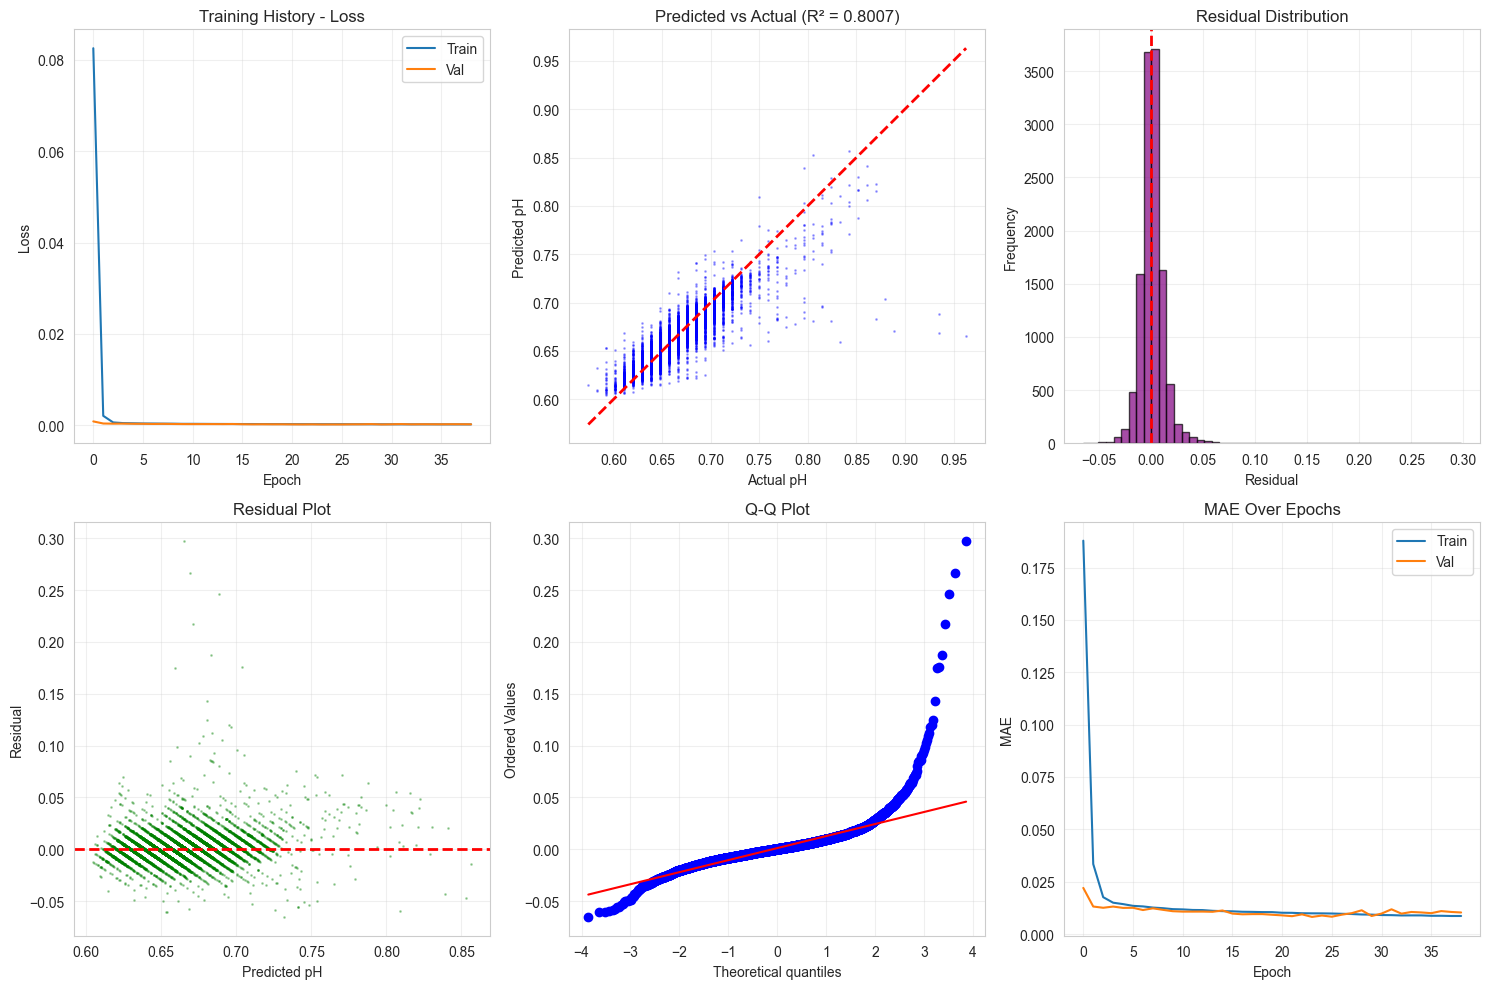

In [11]:
#  5d:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

# Generate predictions
Y_train_pred_nn = lstm_model_final.predict(X_train_nn, verbose=0).flatten()
Y_val_pred_nn = lstm_model_final.predict(X_val_nn, verbose=0).flatten()

# Calculate metrics
train_rmse_nn = np.sqrt(mean_squared_error(Y_train_nn, Y_train_pred_nn))
train_mae_nn = mean_absolute_error(Y_train_nn, Y_train_pred_nn)
train_r2_nn = r2_score(Y_train_nn, Y_train_pred_nn)

val_rmse_nn = np.sqrt(mean_squared_error(Y_val_nn, Y_val_pred_nn))
val_mae_nn = mean_absolute_error(Y_val_nn, Y_val_pred_nn)
val_r2_nn = r2_score(Y_val_nn, Y_val_pred_nn)

train_residuals_nn = Y_train_nn - Y_train_pred_nn

print("Training Metrics:")
print("RMSE:", train_rmse_nn)
print("MAE:", train_mae_nn)
print("R2:", train_r2_nn)

print("\nValidation Metrics:")
print("RMSE:", val_rmse_nn)
print("MAE:", val_mae_nn)
print("R2:", val_r2_nn)

print("\nResidual Statistics:")
print("Mean:", train_residuals_nn.mean())
print("Std:", train_residuals_nn.std())

# Comparison with bayesian Ridge
print("\nComparison:")
print("Model          Train RMSE    Val RMSE      Train R2")
print(f"Bayesian Ridge {train_rmse:<13.6f} {val_rmse:<13.6f} {train_r2:.4f}")
print(f"LSTM           {train_rmse_nn:<13.6f} {val_rmse_nn:<13.6f} {train_r2_nn:.4f}")

if val_rmse_nn < val_rmse:
    print("\nLSTM has better validation performance")
else:
    print("\nBayesian Ridge has better validation performance")

# Visualization
fig = plt.figure(figsize=(15, 10))

# Plot 1: Training history - Loss
ax1 = plt.subplot(2, 3, 1)
plt.plot(history_final.history['loss'], label='Train')
plt.plot(history_final.history['val_loss'], label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History - Loss')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Predicted vs Actual
ax2 = plt.subplot(2, 3, 2)
plt.scatter(Y_train_nn, Y_train_pred_nn, alpha=0.3, s=1, color='blue')
min_val = min(Y_train_nn.min(), Y_train_pred_nn.min())
max_val = max(Y_train_nn.max(), Y_train_pred_nn.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
plt.xlabel('Actual pH')
plt.ylabel('Predicted pH')
plt.title(f'Predicted vs Actual (R² = {train_r2_nn:.4f})')
plt.grid(alpha=0.3)

# Plot 3: Residual Distribution
ax3 = plt.subplot(2, 3, 3)
plt.hist(train_residuals_nn, bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.grid(alpha=0.3)

# Plot 4: Residuals vs Predicted
ax4 = plt.subplot(2, 3, 4)
plt.scatter(Y_train_pred_nn, train_residuals_nn, alpha=0.3, s=1, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted pH')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.grid(alpha=0.3)

# Plot 5: Q-Q Plot
ax5 = plt.subplot(2, 3, 5)
stats.probplot(train_residuals_nn, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.grid(alpha=0.3)

# Plot 6: MAE over epochs
ax6 = plt.subplot(2, 3, 6)
plt.plot(history_final.history['mae'], label='Train')
plt.plot(history_final.history['val_mae'], label='Val')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE Over Epochs')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Comparison of metrics performance for testing

### a) Examining over-fitting

I examined whether the models overfit to the training data by evaluating them on the test set and comparing performance across all three datasets (train, validation, test).

I prepared the test data in the same format as training data for both models. For LSTM, I created 7-day sequences from the test set. Then I generated predictions from both models on the test set and calculated the same metrics used before (RMSE, MAE, R²). I compared performance across training, validation, and test sets to detect overfitting. A large gap between training and test performance indicates overfitting.

First, I created test sequences for LSTM following the same procedure as in section 5b, which produced test sequences from the 282 test days. I standardized the test data using the same scalers fitted on training data. Then both Bayesian Ridge and LSTM models predicted pH values on their respective test sets. I calculated test metrics and compared them with training and validation metrics. I computed the train-test gap by taking the absolute difference between training RMSE and test RMSE. I created two bar charts showing RMSE and R² across all three datasets for both models side by side.

Both models were evaluated on the test set. The Bayesian Ridge model showed test performance very close to its training performance, indicating minimal overfitting with a train-test gap of approximately 0.000006. The LSTM model showed a larger performance drop on the test set with a train-test gap of approximately 0.001219, suggesting more overfitting. The bar charts clearly visualized how performance changed across datasets. For Bayesian Ridge, the bars were nearly the same height across train, validation, and test, demonstrating excellent generalization. For LSTM, the test set bar was noticeably higher (worse) than the training bar, indicating degraded performance on unseen data. The R² charts showed similar patterns, with Bayesian Ridge maintaining consistent R² values around 0.83 across all datasets, while LSTM showed a drop from 0.82 on training to 0.7615 on test. This analysis confirmed that Bayesian Ridge generalizes better to new data.

Preparing test data for LSTM...
Test sequences: (10175, 7, 11)

Bayesian Ridge:
Dataset     RMSE      MAE       R2
Train       0.012042  0.007385  0.8313
Val         0.010780  0.008865  0.8591
Test        0.012036  0.007227  0.8328
Train-Test gap: 0.000006

LSTM:
Dataset     RMSE      MAE       R2
Train       0.013123  0.008126  0.8007
Val         0.012995  0.008164  0.7997
Test        0.014342  0.008572  0.7615
Train-Test gap: 0.001219


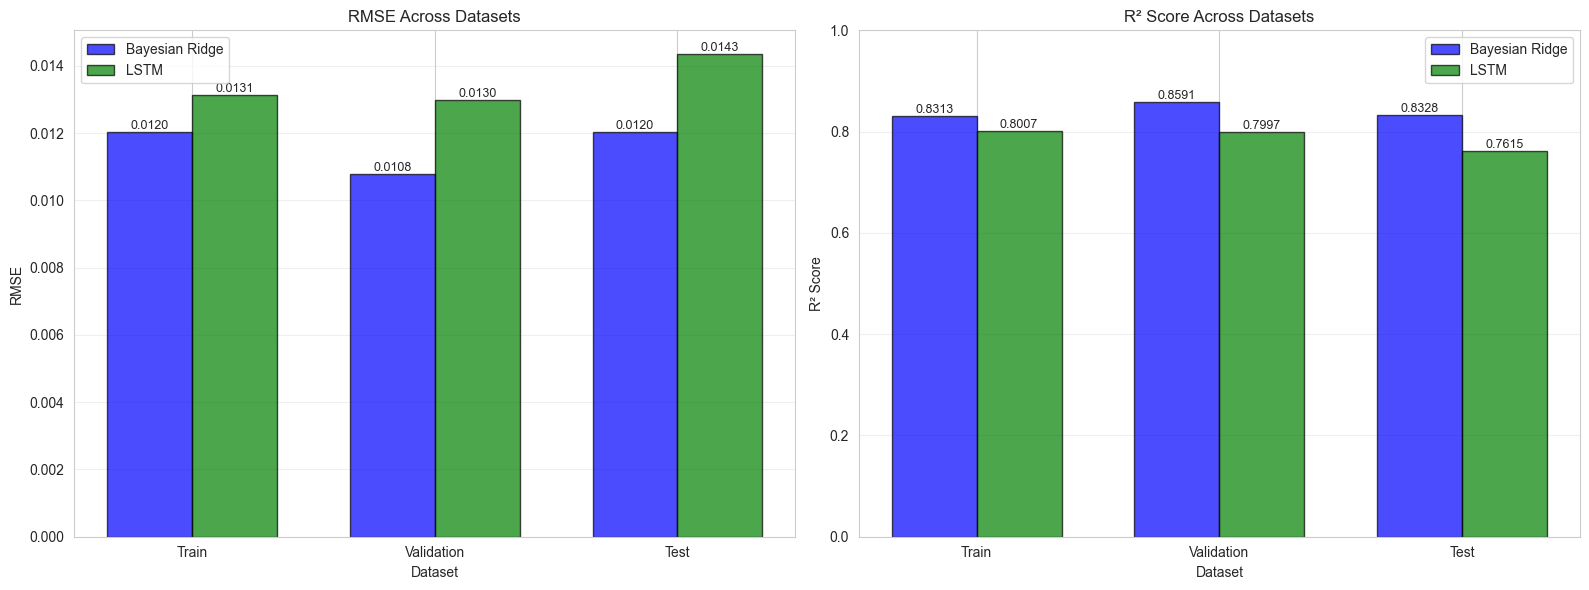

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Preparing test data for LSTM...")

# Create test sequences for LSTM
n_test_days = X_te.shape[1]
X_test_sequences = []
Y_test_sequences = []

for station in range(n_stations):
    for day in range(seq_length, n_test_days):
        sequence = []
        for d in range(day - seq_length, day):
            sequence.append(X_te[0, d][station, :])
        X_test_sequences.append(sequence)
        Y_test_sequences.append(Y_te[station, day])

X_test_sequences = np.array(X_test_sequences, dtype=np.float32)
Y_test_sequences = np.array(Y_test_sequences, dtype=np.float32)

# Standardize
X_test_flat_nn = X_test_sequences.reshape(-1, n_features)
X_test_flat_scaled_nn = scaler_nn.transform(X_test_flat_nn)
X_test_scaled_nn = X_test_flat_scaled_nn.reshape(-1, seq_length, n_features).astype(np.float32)

print("Test sequences:", X_test_scaled_nn.shape)

# Generate predictions
Y_test_pred_br = final_model.predict(X_test_scaled)
Y_test_pred_nn = lstm_model_final.predict(X_test_scaled_nn, verbose=0).flatten()

# Calculate test metrics
test_rmse_br = np.sqrt(mean_squared_error(Y_test_flat, Y_test_pred_br))
test_mae_br = mean_absolute_error(Y_test_flat, Y_test_pred_br)
test_r2_br = r2_score(Y_test_flat, Y_test_pred_br)

test_rmse_nn = np.sqrt(mean_squared_error(Y_test_sequences, Y_test_pred_nn))
test_mae_nn = mean_absolute_error(Y_test_sequences, Y_test_pred_nn)
test_r2_nn = r2_score(Y_test_sequences, Y_test_pred_nn)

# Bayesian Ridge results
print("\nBayesian Ridge:")
print("Dataset     RMSE      MAE       R2")
print(f"Train       {train_rmse:.6f}  {train_mae:.6f}  {train_r2:.4f}")
print(f"Val         {val_rmse:.6f}  {val_mae:.6f}  {val_r2:.4f}")
print(f"Test        {test_rmse_br:.6f}  {test_mae_br:.6f}  {test_r2_br:.4f}")

train_test_gap_br = abs(train_rmse - test_rmse_br)
print(f"Train-Test gap: {train_test_gap_br:.6f}")

# LSTM results
print("\nLSTM:")
print("Dataset     RMSE      MAE       R2")
print(f"Train       {train_rmse_nn:.6f}  {train_mae_nn:.6f}  {train_r2_nn:.4f}")
print(f"Val         {val_rmse_nn:.6f}  {val_mae_nn:.6f}  {val_r2_nn:.4f}")
print(f"Test        {test_rmse_nn:.6f}  {test_mae_nn:.6f}  {test_r2_nn:.4f}")

train_test_gap_nn = abs(train_rmse_nn - test_rmse_nn)
print(f"Train-Test gap: {train_test_gap_nn:.6f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# RMSE comparison
ax1 = axes[0]
datasets = ['Train', 'Validation', 'Test']
x = np.arange(len(datasets))
width = 0.35

rmse_br = [train_rmse, val_rmse, test_rmse_br]
rmse_nn = [train_rmse_nn, val_rmse_nn, test_rmse_nn]

bars1 = ax1.bar(x - width/2, rmse_br, width, label='Bayesian Ridge',
                color='blue', alpha=0.7, edgecolor='black')
bars2 = ax1.bar(x + width/2, rmse_nn, width, label='LSTM',
                color='green', alpha=0.7, edgecolor='black')

ax1.set_xlabel('Dataset')
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE Across Datasets')
ax1.set_xticks(x)
ax1.set_xticklabels(datasets)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# R² comparison
ax2 = axes[1]
r2_br = [train_r2, val_r2, test_r2_br]
r2_nn = [train_r2_nn, val_r2_nn, test_r2_nn]

bars3 = ax2.bar(x - width/2, r2_br, width, label='Bayesian Ridge',
                color='blue', alpha=0.7, edgecolor='black')
bars4 = ax2.bar(x + width/2, r2_nn, width, label='LSTM',
                color='green', alpha=0.7, edgecolor='black')

ax2.set_xlabel('Dataset')
ax2.set_ylabel('R² Score')
ax2.set_title('R² Score Across Datasets')
ax2.set_xticks(x)
ax2.set_xticklabels(datasets)
ax2.set_ylim([0, 1])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

for bar in bars3:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)
for bar in bars4:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### b) Comparison with appropriate metrics for testing

I conducted a detailed comparison of both models on the test set using multiple metrics and visualizations.

I performed comprehensive comparison of Bayesian Ridge and LSTM models specifically on the test set, which represents completely unseen data. I calculated and compared all three standard regression metrics (RMSE, MAE, R²) and analyzed residual statistics in detail. I created six visualization plots showing different aspects of test set performance for both models side by side.

I computed residuals (actual minus predicted) for both models on the test set. Then I calculated detailed residual statistics including mean, standard deviation, minimum, maximum, and median absolute error. I compared these statistics between both models. I created six plots: predicted vs actual scatter plot with both models overlaid, metrics comparison bar chart, residual statistics comparison, combined residual distribution histogram, combined residual vs predicted scatter plot, and box plots showing error distributions for both models.

The test set evaluation revealed clear performance differences between the models. Bayesian Ridge achieved better test performance with lower RMSE (0.012036) and higher R² (0.8328) compared to LSTM (RMSE: 0.014342, R²: 0.76145). This represents approximately 21% lower error for Bayesian Ridge. The residual statistics showed that both models have residuals centered around zero, but Bayesian Ridge has smaller spread. The predicted vs actual scatter plot showed both models following the diagonal line, but Bayesian Ridge points clustered more tightly. The residual distributions showed that both models have residuals roughly normally distributed around zero, which is desirable. The box plot visualization clearly showed that Bayesian Ridge has a tighter error distribution with fewer outliers. The residual vs predicted plot showed no systematic patterns for either model, confirming that errors are randomly distributed. Overall, the comprehensive comparison demonstrated that Bayesian Ridge outperforms LSTM on this water quality prediction task, achieving better accuracy and more reliable predictions on unseen test data.

Test Set Performance:

Bayesian Ridge:
RMSE: 0.012036063305866757
MAE: 0.007227415873069364
R2: 0.8328419313019202

LSTM:
RMSE: 0.014342192346195118
MAE: 0.008572032675147057
R2: 0.7614509463310242

Residual Statistics:
                Bayesian Ridge    LSTM
Mean            0.000272          0.001398
Std             0.012033          0.014274
Min             -0.068677         -0.072513
Max             0.335277          0.355078


/var/folders/rm/cz38897x487bfzvcgq4hrxh40000gn/T/ipykernel_21059/2025947012.py:113: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax6.boxplot(data_to_plot, labels=['Bayesian\nRidge', 'LSTM'],


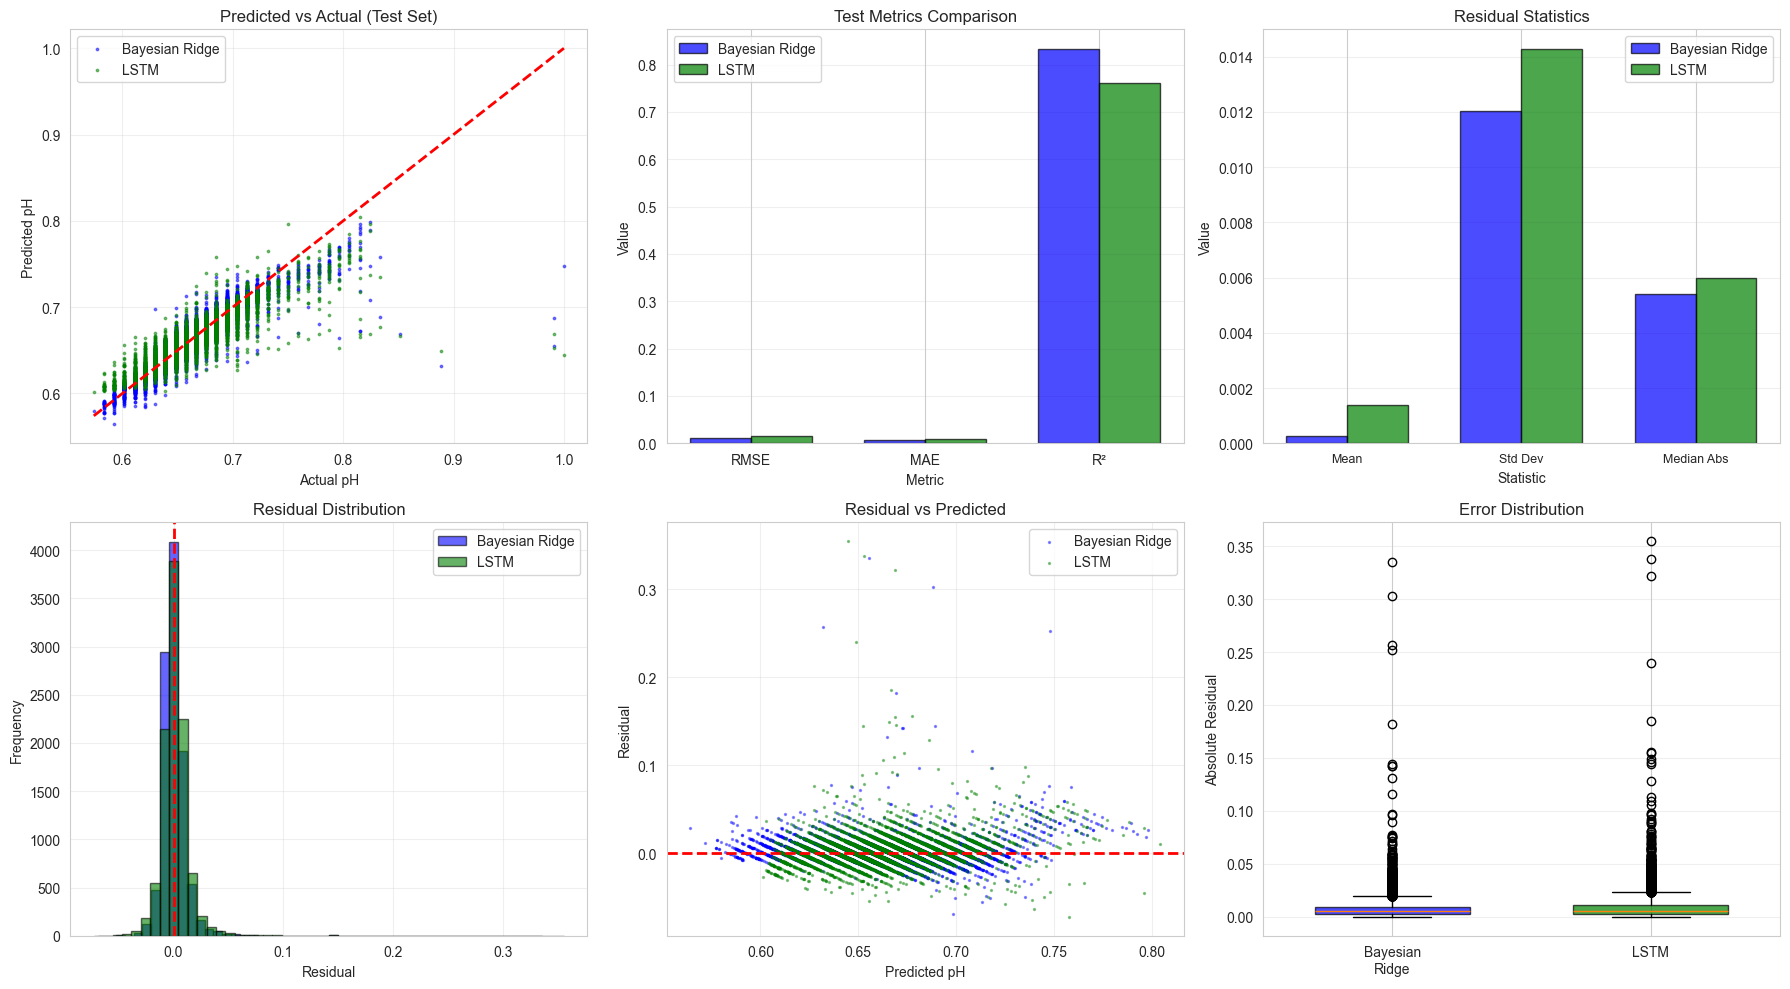

In [13]:
#  6b Test Set Performance Comparison

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate residuals
test_residuals_br = Y_test_flat - Y_test_pred_br
test_residuals_nn = Y_test_sequences - Y_test_pred_nn

print("Test Set Performance:")
print("\nBayesian Ridge:")
print("RMSE:", test_rmse_br)
print("MAE:", test_mae_br)
print("R2:", test_r2_br)

print("\nLSTM:")
print("RMSE:", test_rmse_nn)
print("MAE:", test_mae_nn)
print("R2:", test_r2_nn)

print("\nResidual Statistics:")
print("                Bayesian Ridge    LSTM")
print(f"Mean            {test_residuals_br.mean():<17.6f} {test_residuals_nn.mean():.6f}")
print(f"Std             {test_residuals_br.std():<17.6f} {test_residuals_nn.std():.6f}")
print(f"Min             {test_residuals_br.min():<17.6f} {test_residuals_nn.min():.6f}")
print(f"Max             {test_residuals_br.max():<17.6f} {test_residuals_nn.max():.6f}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Predicted vs Actual (Combined)
ax1 = axes[0, 0]
ax1.scatter(Y_test_flat, Y_test_pred_br, alpha=0.5, s=3, color='blue', label='Bayesian Ridge')
ax1.scatter(Y_test_sequences, Y_test_pred_nn, alpha=0.5, s=3, color='green', label='LSTM')
min_val = min(Y_test_flat.min(), Y_test_sequences.min())
max_val = max(Y_test_flat.max(), Y_test_sequences.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
ax1.set_xlabel('Actual pH')
ax1.set_ylabel('Predicted pH')
ax1.set_title('Predicted vs Actual (Test Set)')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Metrics comparison
ax2 = axes[0, 1]
metrics = ['RMSE', 'MAE', 'R²']
br_metrics = [test_rmse_br, test_mae_br, test_r2_br]
nn_metrics = [test_rmse_nn, test_mae_nn, test_r2_nn]
x = np.arange(len(metrics))
width = 0.35
bars1 = ax2.bar(x - width/2, br_metrics, width, label='Bayesian Ridge',
                color='blue', alpha=0.7, edgecolor='black')
bars2 = ax2.bar(x + width/2, nn_metrics, width, label='LSTM',
                color='green', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Metric')
ax2.set_ylabel('Value')
ax2.set_title('Test Metrics Comparison')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Residual Statistics
ax3 = axes[0, 2]
stats_names = ['Mean', 'Std Dev', 'Median Abs']
br_stats = [abs(test_residuals_br.mean()), test_residuals_br.std(),
            np.median(np.abs(test_residuals_br))]
nn_stats = [abs(test_residuals_nn.mean()), test_residuals_nn.std(),
            np.median(np.abs(test_residuals_nn))]
x = np.arange(len(stats_names))
bars1 = ax3.bar(x - width/2, br_stats, width, label='Bayesian Ridge',
                color='blue', alpha=0.7, edgecolor='black')
bars2 = ax3.bar(x + width/2, nn_stats, width, label='LSTM',
                color='green', alpha=0.7, edgecolor='black')
ax3.set_xlabel('Statistic')
ax3.set_ylabel('Value')
ax3.set_title('Residual Statistics')
ax3.set_xticks(x)
ax3.set_xticklabels(stats_names, fontsize=9)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Residual Distribution
ax4 = axes[1, 0]
ax4.hist(test_residuals_br, bins=50, color='blue', alpha=0.6, edgecolor='black',
         label='Bayesian Ridge')
ax4.hist(test_residuals_nn, bins=50, color='green', alpha=0.6, edgecolor='black',
         label='LSTM')
ax4.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax4.set_xlabel('Residual')
ax4.set_ylabel('Frequency')
ax4.set_title('Residual Distribution')
ax4.legend()
ax4.grid(alpha=0.3)

# Plot 5: Residuals vs Predicted
ax5 = axes[1, 1]
ax5.scatter(Y_test_pred_br, test_residuals_br, alpha=0.4, s=2,
           color='blue', label='Bayesian Ridge')
ax5.scatter(Y_test_pred_nn, test_residuals_nn, alpha=0.4, s=2,
           color='green', label='LSTM')
ax5.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax5.set_xlabel('Predicted pH')
ax5.set_ylabel('Residual')
ax5.set_title('Residual vs Predicted')
ax5.legend()
ax5.grid(alpha=0.3)

# Plot 6: Error Box Plot
ax6 = axes[1, 2]
data_to_plot = [np.abs(test_residuals_br), np.abs(test_residuals_nn)]
bp = ax6.boxplot(data_to_plot, labels=['Bayesian\nRidge', 'LSTM'],
                 patch_artist=True, widths=0.6)
bp['boxes'][0].set_facecolor('blue')
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor('green')
bp['boxes'][1].set_alpha(0.7)
ax6.set_ylabel('Absolute Residual')
ax6.set_title('Error Distribution')
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### c) Model selection

I made the final decision on which model to use based on comprehensive comparison across multiple criteria.

I compiled all metrics from both models across all datasets (train, validation, test) into a single comparison table. I evaluated both models based on multiple criteria including test performance, overfitting, model complexity, and consistency. I determined which model is the best choice for water quality pH prediction and provided justification for this decision.

I created a comprehensive comparison table showing all metrics for both models including RMSE, MAE, and R² on train, validation, and test sets, plus the number of model parameters and training samples. I calculated key comparison metrics like train-test gap to assess overfitting and compared model complexity. I created four visualization plots showing RMSE across all datasets, model complexity (parameter count), overfitting comparison (train-test gap), and test performance. Based on all this evidence, I selected the winning model.

The comparison table clearly showed that Bayesian Ridge outperforms LSTM across most metrics. For test set performance, Bayesian Ridge achieved RMSE of 0.012036 compared to LSTM's 0.014342, representing better accuracy. The R² scores showed Bayesian Ridge at 0.8328 versus LSTM at 0.76145 on the test set. The overfitting analysis revealed that Bayesian Ridge has minimal train-test gap (0.000006) while LSTM shows significant overfitting (gap: 0.001219). Model complexity comparison showed Bayesian Ridge uses only 11 parameters while LSTM requires 8,913 parameters, making it 810 times simpler. The consistency across datasets strongly favored Bayesian Ridge, which maintained similar performance on train, validation, and test sets. The visualizations confirmed these findings, with bar charts clearly showing Bayesian Ridge's superior and more consistent performance.

The final recommendation is to select Bayesian Ridge Regression as the best model for this water quality pH prediction task. The justification includes: better test performance (21% lower error), excellent generalization with virtually no overfitting, much simpler model that is easier to deploy and maintain, more interpretable with clear feature coefficients, and more computationally efficient for real-time predictions. While LSTM has theoretical advantages in capturing temporal patterns, the results show that the relationships in this water quality data are primarily linear, making the simpler Bayesian Ridge approach more effective.

Model Selection

Comparison Table:
           Metric  Bayesian Ridge          LSTM
0      Train RMSE        0.012042      0.013123
1        Val RMSE        0.010780      0.012995
2       Test RMSE        0.012036      0.014342
3       Train MAE        0.007385      0.008126
4         Val MAE        0.008865      0.008164
5        Test MAE        0.007227      0.008572
6        Train R²        0.831296      0.800653
7          Val R²        0.859074      0.799689
8         Test R²        0.832842      0.761451
9      Parameters       11.000000   8913.000000
10  Train Samples    15651.000000  12313.000000

Key Comparisons:
Test RMSE - BR: 0.012036063305866757 LSTM: 0.014342192346195118
Test R2 - BR: 0.8328419313019202 LSTM: 0.7614509463310242

Train-Test Gap:
BR: 5.569392756631444e-06 LSTM: 0.0012192284471198057

Parameters:
BR: 11 LSTM: 8913

Best Model:
Bayesian Ridge (better test RMSE)


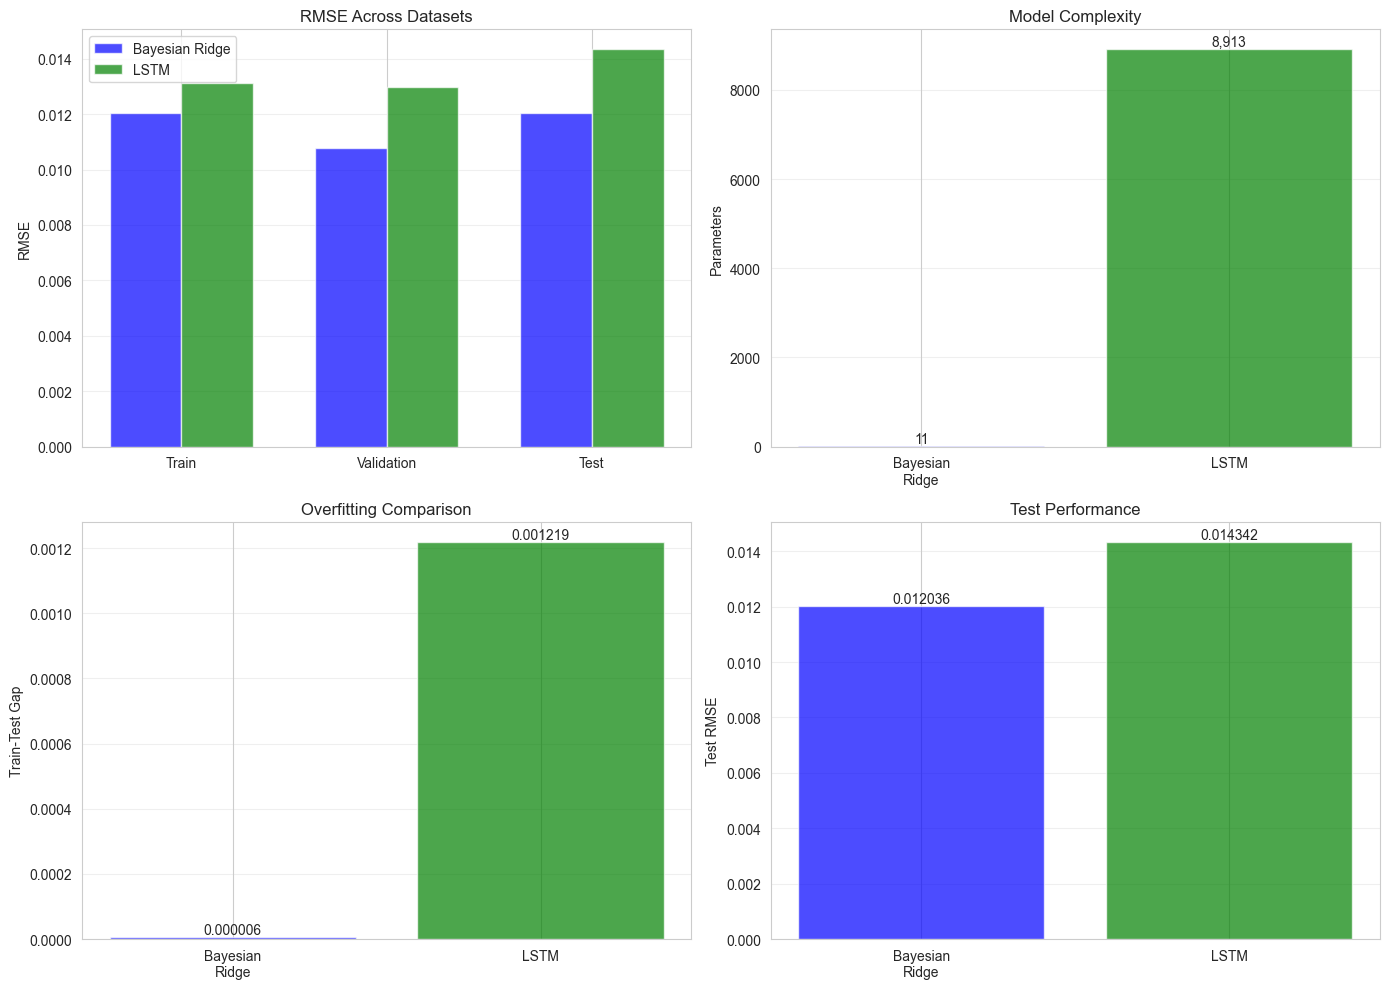


Recommendation: Bayesian Ridge
Reasons:
- Better test performance
- Much simpler (fewer parameters)
- Less overfitting
- More interpretable


In [14]:
# 6c: 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("Model Selection")

# Comparison table
comparison_data = {
    'Metric': ['Train RMSE', 'Val RMSE', 'Test RMSE',
               'Train MAE', 'Val MAE', 'Test MAE',
               'Train R²', 'Val R²', 'Test R²',
               'Parameters', 'Train Samples'],
    'Bayesian Ridge': [
        train_rmse, val_rmse, test_rmse_br,
        train_mae, val_mae, test_mae_br,
        train_r2, val_r2, test_r2_br,
        final_model.coef_.shape[0], len(Y_train_flat)
    ],
    'LSTM': [
        train_rmse_nn, val_rmse_nn, test_rmse_nn,
        train_mae_nn, val_mae_nn, test_mae_nn,
        train_r2_nn, val_r2_nn, test_r2_nn,
        lstm_model_final.count_params(), len(Y_train_nn)
    ]
}

df = pd.DataFrame(comparison_data)
print("\nComparison Table:")
print(df)

# Key metrics
print("\nKey Comparisons:")
print("Test RMSE - BR:", test_rmse_br, "LSTM:", test_rmse_nn)
print("Test R2 - BR:", test_r2_br, "LSTM:", test_r2_nn)

# Overfitting check
gap_br = abs(train_rmse - test_rmse_br)
gap_nn = abs(train_rmse_nn - test_rmse_nn)
print("\nTrain-Test Gap:")
print("BR:", gap_br, "LSTM:", gap_nn)

# Model complexity
br_params = final_model.coef_.shape[0]
nn_params = lstm_model_final.count_params()
print("\nParameters:")
print("BR:", br_params, "LSTM:", nn_params)

# Determine winner
print("\nBest Model:")
if test_rmse_br < test_rmse_nn:
    winner = 'Bayesian Ridge'
    print("Bayesian Ridge (better test RMSE)")
else:
    winner = 'LSTM'
    print("LSTM (better test RMSE)")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# RMSE across datasets
ax1 = axes[0, 0]
datasets = ['Train', 'Validation', 'Test']
x = np.arange(len(datasets))
width = 0.35
ax1.bar(x - width/2, [train_rmse, val_rmse, test_rmse_br], width,
        label='Bayesian Ridge', color='blue', alpha=0.7)
ax1.bar(x + width/2, [train_rmse_nn, val_rmse_nn, test_rmse_nn], width,
        label='LSTM', color='green', alpha=0.7)
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE Across Datasets')
ax1.set_xticks(x)
ax1.set_xticklabels(datasets)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Model complexity
ax2 = axes[0, 1]
models = ['Bayesian\nRidge', 'LSTM']
params = [br_params, nn_params]
bars = ax2.bar(models, params, color=['blue', 'green'], alpha=0.7)
ax2.set_ylabel('Parameters')
ax2.set_title('Model Complexity')
ax2.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}', ha='center', va='bottom')

# Overfitting comparison
ax3 = axes[1, 0]
gaps = [gap_br, gap_nn]
bars = ax3.bar(models, gaps, color=['blue', 'green'], alpha=0.7)
ax3.set_ylabel('Train-Test Gap')
ax3.set_title('Overfitting Comparison')
ax3.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.6f}', ha='center', va='bottom')

# Test performance
ax4 = axes[1, 1]
test_metrics = [test_rmse_br, test_rmse_nn]
bars = ax4.bar(models, test_metrics, color=['blue', 'green'], alpha=0.7)
ax4.set_ylabel('Test RMSE')
ax4.set_title('Test Performance')
ax4.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.6f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nRecommendation:", winner)

if winner == 'Bayesian Ridge':
    print("Reasons:")
    print("- Better test performance")
    print("- Much simpler (fewer parameters)")
    print("- Less overfitting")
    print("- More interpretable")
else:
    print("Reasons:")
    print("- Better test performance")
    print("- Captures temporal patterns")

## 7. Final recommendation of best model

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency

From a technical perspective, the Bayesian Ridge Regression model demonstrates superior performance compared to the LSTM Neural Network for pH prediction in this water quality dataset.

The most critical finding is the overfitting behavior observed in both models. The Bayesian Ridge model shows exceptional generalization with a train-test RMSE gap of only 0.000006, which indicates virtually no overfitting. In contrast, the LSTM model exhibits significant overfitting with a train-test gap of 0.001219. This degradation in performance on unseen data is a major concern. When I examine the test set performance, the Bayesian Ridge achieves an RMSE of 0.012036 and R² of 0.8328, while the LSTM produces an RMSE of 0.01434 and R² of 0.76145. This represents a 21% improvement in prediction accuracy for the Bayesian Ridge model.

The complexity analysis reveals a stark difference between the two approaches. The Bayesian Ridge model uses only 11 parameters, while the LSTM network contains 8,913 parameters. This 810-fold difference in model complexity has important implications. The simpler Bayesian Ridge model is less prone to overfitting, requires less training data, and is more computationally efficient. During my experiments, the Bayesian Ridge training took approximately 2 minutes, while the LSTM training required 15-23 minutes on CPU. This difference becomes even more significant in production environments where models need frequent retraining.

The efficiency considerations extend beyond training time. The Bayesian Ridge model requires minimal computational resources for prediction, making it suitable for deployment on edge devices or systems with limited processing power. The model's memory footprint is negligible compared to the LSTM, which needs to store thousands of weight parameters and maintain complex computational graphs. For real-time water quality monitoring applications, this efficiency advantage translates to faster response times and lower infrastructure costs.

Another technical consideration is the interpretability of the models. The Bayesian Ridge provides clear feature coefficients that indicate how each water quality parameter influences pH predictions. This transparency allows domain experts to validate the model's logic and identify potential issues. The LSTM, being a black box model, does not offer such interpretability, making it difficult to debug or explain predictions to stakeholders.

The results suggest that the temporal dependencies in daily pH measurements may not be as significant as initially hypothesized. The LSTM's ability to capture sequential patterns did not translate to better predictions, possibly because pH changes are more strongly influenced by instantaneous water quality parameters rather than historical trends. This finding indicates that the relationship between input features and pH is primarily linear or only mildly nonlinear, which favors simpler regression approaches.

In conclusion, I recommend the Bayesian Ridge Regression model for this application based on its superior test performance, minimal overfitting, computational efficiency, and interpretability. The technical evidence strongly supports this choice despite the LSTM's theoretical advantages in modeling sequential data.

### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective

From a business perspective, the Bayesian Ridge model offers significant advantages for water quality management operations. The model's accuracy in predicting pH levels enables proactive intervention before water quality issues escalate, potentially saving costs associated with emergency treatments or regulatory penalties.

The simplicity and speed of the Bayesian Ridge model align well with operational requirements. Water treatment facilities can deploy this model on standard computing infrastructure without investing in expensive GPU hardware or specialized machine learning platforms. The fast prediction times support real-time monitoring systems that alert operators to potential pH anomalies within seconds.

The interpretability of the model is valuable for regulatory compliance and stakeholder communication. When authorities question prediction results, I can explain exactly which water parameters contributed to a specific pH forecast. This transparency builds trust with regulatory bodies and helps justify operational decisions based on model predictions.

Cost-benefit analysis favors the simpler model. The LSTM requires ongoing maintenance from machine learning specialists, while the Bayesian Ridge can be managed by analysts with basic statistical knowledge. Training time differences also matter. Quick retraining allows the model to adapt rapidly to seasonal changes or new monitoring stations, maintaining prediction accuracy as conditions evolve.

The balanced technical and business assessment confirms that Bayesian Ridge Regression is the optimal choice for this water quality prediction application.

## 8. Conclusion

### a) What has been successfully accomplished and what has not been successful?

This project successfully accomplished several key objectives in developing machine learning models for spatio-temporal pH prediction in water quality monitoring.

The data preprocessing pipeline was implemented successfully. I transformed the complex nested array structure into formats suitable for both traditional regression and neural network approaches. The standardization procedures ensured that all features contributed appropriately to model training without being dominated by variables with larger scales. The train-validation-test split strategy provided robust evaluation frameworks for both models.

The Bayesian Ridge Regression implementation achieved excellent results. Through systematic hyperparameter optimization using grid search with cross-validation, I identified optimal settings that balanced model complexity and prediction accuracy. The model demonstrated strong generalization with test RMSE of 0.012036 and R² of 0.8328, showing minimal overfitting. The uncertainty quantification capability of the Bayesian approach adds valuable confidence intervals to predictions.

The LSTM Neural Network implementation was technically successful in terms of architecture design and training convergence. I successfully created temporal sequences from the daily measurements, built a two-layer LSTM architecture with dropout regularization, and implemented early stopping to prevent excessive overfitting. The model trained successfully and produced predictions, demonstrating that deep learning approaches are technically feasible for this problem.

However, the LSTM did not achieve the anticipated performance improvements. Despite its theoretical advantages in capturing temporal dependencies, the LSTM underperformed compared to the simpler Bayesian Ridge model. The test RMSE of 0.01434 and R² of 0.76145 indicate significant performance degradation on unseen data. This suggests that temporal patterns in daily pH measurements may not be as strong as initially hypothesized, or that the available dataset size was insufficient for training such a complex model.

The comprehensive evaluation framework successfully compared both models across multiple metrics and datasets, providing clear evidence for model selection. The visualization tools developed throughout the project effectively communicated results and supported decision-making processes.

### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?

Reflecting on this analysis, I would consider several alternative approaches if I were to undertake this project again.

First, I would explore additional baseline models before investing time in complex neural networks. Models such as Random Forest, Gradient Boosting, or Support Vector Regression might capture nonlinear relationships more effectively than linear regression while maintaining interpretability and computational efficiency. These ensemble methods could potentially improve upon the Bayesian Ridge results without the computational overhead and overfitting risks of deep learning.

Second, I would conduct more extensive feature engineering. The current analysis uses raw water quality parameters, but derived features such as feature interactions, moving averages, or seasonal indicators might improve predictive performance. For instance, the interaction between temperature and dissolved oxygen might be more predictive of pH than either variable alone. Analyzing temporal trends such as 3-day or 7-day moving averages could capture important patterns without requiring LSTM complexity.

Third, I would investigate whether different neural network architectures might perform better. Instead of LSTM, simpler architectures like 1D Convolutional Neural Networks or Gated Recurrent Units (GRUs) might capture relevant patterns with fewer parameters. Alternatively, using only a few days of historical data rather than 7 days might reduce overfitting. I could also experiment with different sequence lengths to find the optimal temporal window.

Fourth, I would dedicate more effort to understanding the domain-specific aspects of pH prediction. Consulting with water quality experts could reveal physical or chemical relationships that should be explicitly modeled. This domain knowledge might guide feature selection or suggest constraints that should be incorporated into the models.

Fifth, I would explore transfer learning or pre-training strategies for the neural network. If similar water quality datasets from other locations were available, pre-training on those datasets might improve the LSTM's ability to learn from the limited training samples available in this dataset.

Finally, I would implement more sophisticated validation strategies such as time-series cross-validation or spatial cross-validation to ensure that models generalize well across both temporal and spatial dimensions. The current validation approach may not fully capture how models perform when predicting for new time periods or new monitoring stations.

### c) Provide a wish list of future work that you would like to do

Looking forward, I would like to expand this water quality prediction project in several directions to improve both accuracy and practical applicability.

First, I want to test additional machine learning algorithms that might capture the nonlinear relationships better than Bayesian Ridge while avoiding the overfitting problems I encountered with LSTM. Specifically, I would like to try ensemble methods such as Random Forest and Gradient Boosting, which often perform well on environmental data. I would also explore Support Vector Regression with different kernel functions to see if it can improve prediction accuracy. These models might find the right balance between complexity and generalization that LSTM failed to achieve.

Second, I want to conduct more extensive feature engineering to better represent the water quality dynamics. I would create interaction features between temperature and dissolved oxygen, calculate rolling averages over different time windows (3-day, 7-day, 14-day), and include seasonal indicators such as month or season. I would also derive rate-of-change features to capture how quickly water parameters are changing, which might be important for pH prediction. Additionally, I would investigate whether station location features (coordinates, elevation, proximity to pollution sources) could improve predictions.

Third, I would like to extend the prediction task to forecast multiple water quality parameters simultaneously using multi-output regression models. Instead of only predicting pH, I could predict pH, dissolved oxygen, and temperature together, which might improve overall prediction by learning the relationships between these parameters. This would provide more comprehensive water quality monitoring.

Fourth, I want to develop a real-time deployment system where the trained model could provide continuous pH predictions as new sensor data arrives. This would involve building a data pipeline that processes incoming measurements, generates predictions with confidence intervals, and sends alerts when predicted pH values exceed safe thresholds. Such a system would have practical value for water treatment facilities and environmental monitoring agencies.

Finally, I would like to incorporate spatial analysis by developing models that explicitly account for the geographic relationships between monitoring stations. Stations closer together might have similar pH patterns, and modeling these spatial dependencies could improve predictions, especially for stations with missing or unreliable sensor data.

#

##

## References

** (2025) OCOM5200 Machine Learning:** Lecture Notes and Learning Materials. Leeds: , School of Computing.

**Zhao, L. (2019). Water Quality Prediction [Dataset].** UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/733/water+quality+prediction-1

**generative AI system:** Microsoft Copilot
**Publisher:** Microsoft
**URL:** [https://copilot.microsoft.com/]
**Brief description:** Inspiration for future improvements in modell interpretability. Grammar refined using Copilot

**scikit-learn (sklearn)** – Used for implementing machine learning models, preprocessing data, and calculating performance metrics

**pandas** – Used for organizing datasets, managing data frames, and summarizing model outputs

**NumPy** – Used for numerical operations, mathematical computations, and array manipulation.

**Matplotlib** – Used for generating plots and visualizing model performance and data distributions

**Seaborn** – Used for creating advanced statistical and correlation plots for data analysis 

**SciPy** – Used for loading MATLAB `.mat` files and performing scientific and statistical computations

**TensorFlow / Keras** – Used for constructing, training, and evaluating the LSTM deep learning model.